# Stock Market Prediction Notebook

# 1. Importing Libraries    

"""
Stock Market Prediction Notebook

This notebook is a template for a stock market prediction project. The project's goal is to use historical stock market data and machine learning techniques to predict the next day's closing price of a stock. The notebook is divided into sections, each section building upon the previous one. The sections are:
- Importing Libraries
- Data Ingestion
- Data Preprocessing
- Feature Engineering
- Model Selection
- Model Evaluation
- Visualization
- Hyperparameter Tuning
- Model Deployment

The notebook is written in a way that is easy to follow and understand, with comments explaining each step of the process. The notebook is also designed to be easily modifiable, so you can use it as a starting point for your own project.


In [1]:
# Stock Market Prediction Notebook

## 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
import ta  # Technical Analysis library # Import yfinance for Yahoo Finance data
# We can add any other necessary libraries (e.g., Scikit-learn, TensorFlow, PyTorch)

In [2]:
# This section loads stock market data from Yahoo Finance for a specified ticker symbol.
ticker = 'NVDA'  # Example: Appl,e Inc. Replace with desired stock ticker
data = yf.download(ticker, start='2015-01-01', end='2025-01-01', interval='1d') # one day range

[*********************100%***********************]  1 of 1 completed


In [3]:
# Cleaning and dropping the NA values
# In this section, the data is cleaned and preprocessed to remove any missing values and prepare it for analysis.
data.dropna(inplace=True)  # Example: Remove missing values
# Additional preprocessing steps can be added here

# 2. Data Preprocessing

* In this section, the data is cleaned and preprocessed to prepare it for analysis. This includes removing missing values, handling outliers, and transforming the data into a suitable format for modeling.

* The following steps are taken to preprocess the data:
1. Remove missing values: The data is checked for missing values and any rows with missing values are removed.
2. Transform the data: The data is transformed into a suitable format for modeling. 



In [4]:
# Technical Indicators
data['SMA_20'] = data['Close'].rolling(window=20).mean()  # 20-day Simple Moving Average
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()  # 20-day Exponential Moving Average
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()  # 50-day Exponential Moving Average
data['RSI'] = ta.momentum.RSIIndicator(data['Close']).rsi()  # Relative Strength Index
data['MACD'] = ta.trend.MACD(data['Close']).macd()  # MACD
data['MACD_Signal'] = ta.trend.MACD(data['Close']).macd_signal()  # MACD Signal Line
data['MACD_Diff'] = ta.trend.MACD(data['Close']).macd_diff()  # MACD Difference
data['Bollinger_High'] = ta.volatility.BollingerBands(data['Close']).bollinger_hband()  # Bollinger High Band
data['Bollinger_Low'] = ta.volatility.BollingerBands(data['Close']).bollinger_lband()  # Bollinger Low Band
data['ATR'] = ta.volatility.AverageTrueRange(data['High'], data['Low'], data['Close']).average_true_range()  # Average True Range


# Drop rows with NaN values
data = data.dropna() 

# Explanation of created indicators:
#   - SMA_20, SMA_50: 20-day and 50-day Simple Moving Averages
#   - EMA_20, EMA_50: 20-day and 50-day Exponential Moving Averages
#   - RSI: Relative Strength Index
#   - MACD, MACD_Signal, MACD_Diff: MACD, MACD Signal Line, and MACD Difference
#   - Bollinger_High, Bollinger_Low: Bollinger High Band and Bollinger Low Band
#   - ATR: Average True Range
#   - Williams_%R: Williams %R
#   - Ultimate_Oscillator: Ultimate Oscillator
#   - Money_Flow_Multiplier, Money_Flow_Volume, Accumulation_Distribution: Money Flow Multiplier, Money Flow Volume, and Accumulation/Distribution Line
#   - Return_Lag1, Return_Lag3, Return_Lag5: Lagged returns from the previous day, 3 days ago, and 5 days ago




In [5]:
# Additional Technical Indicators
data['Williams_%R'] = ta.momentum.WilliamsRIndicator(data['High'], data['Low'], data['Close']).williams_r()
data['Ultimate_Oscillator'] = ta.momentum.UltimateOscillator(data['High'], data['Low'], data['Close']).ultimate_oscillator()

# Volume Indicators
# Calculating the Money Flow Multiplier
data['Money_Flow_Multiplier'] = ((data['Close'] - data['Low']) - (data['High'] - data['Close'])) / (data['High'] - data['Low'])

# Calculating the Money Flow Volume
data['Money_Flow_Volume'] = data['Money_Flow_Multiplier'] * data['Volume']

# Calculating the Accumulation/Distribution Line
data['Accumulation_Distribution'] = data['Money_Flow_Volume'].cumsum()

# Example of Lagged Returns
data['Return_Lag1'] = data['Close'].shift(1).pct_change()  # Previous day's return
data['Return_Lag3'] = data['Close'].shift(3).pct_change()  # 3-day return
data['Return_Lag5'] = data['Close'].shift(5).pct_change()  # 5-day return

# Drop rows with NaN values after creating new features
data = data.dropna()

# Explanation of created indicators:
#   - Williams_%R: Williams %R
#   - Ultimate_Oscillator: Ultimate Oscillator
#   - Money_Flow_Multiplier, Money_Flow_Volume, Accumulation_Distribution: Money Flow Multiplier, Money Flow Volume, and Accumulation/Distribution Line
#   - Return_Lag1, Return_Lag3, Return_Lag5: Lagged returns from the previous day, 3 days ago, and 5 days ago


C:\Users\MONSTER\AppData\Local\Temp\ipykernel_7036\1624999325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Williams_%R'] = ta.momentum.WilliamsRIndicator(data['High'], data['Low'], data['Close']).williams_r()
C:\Users\MONSTER\AppData\Local\Temp\ipykernel_7036\1624999325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ultimate_Oscillator'] = ta.momentum.UltimateOscillator(data['High'], data['Low'], data['Close']).ultimate_oscillator()
C:\Users\MONSTER\AppData\Local\Temp\ipykernel_7036\

# Model Training and Evaluation
    
    
    In this section, the model is trained and evaluated using the created features and target variable. The model used is a Linear Regression model, and the evaluation metrics used are Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared. The model is trained on the training set and evaluated on the testing set. The evaluation metrics are used to determine the performance of the model on unseen data.


In [6]:
## 5. Model Development
# Here, the model development process is described, including the creation of lagged features for the closing price.


# Creation of lagged features for the closing price
data['Close_Lag1'] = data['Close'].shift(1)  # Lagged closing price from the previous day
data['Close_Lag2'] = data['Close'].shift(2)  # Lagged closing price from two days ago

# After Lagged feautres created we transform before day features
data['Open_Lag1'] = data['Open'].shift(1)
data['High_Lag1'] = data['High'].shift(1)
data['Low_Lag1'] = data['Low'].shift(1)
data['Volume_Lag1'] = data['Volume'].shift(1)

# Before defininf X and y we drop NaN values
data.dropna(inplace=True)

# exclude columns that will not be used as features which carries current day's information
exclude_columns = ['Open','Close', 'High', 'Low', 'Volume', 'Adj Close']

# Selecting features by dropping the excluded columns
X = data.drop(columns=exclude_columns)
y = data['Close']


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
# Evaluating the model's performance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score


predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mape = mean_absolute_percentage_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R^2: {r_squared}')


xg_predictions = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, xg_predictions))
mape = mean_absolute_percentage_error(y_test, xg_predictions)
r_squared = r2_score(y_test, xg_predictions)

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R^2: {r_squared}')

RMSE: 0.4948622302147247
MAPE: 0.033825166256800675
R^2: 0.9997672290357883
RMSE: 1.2845557094065043
MAPE: 0.0236527935556359
R^2: 0.9984315666183852


# Hyperparameter Tuning

Hyperparameter tuning is the process of optimizing the parameters of a machine learning algorithm to achieve the best performance. In this case, we are using the GridSearchCV class from Scikit-Learn to perform hyperparameter tuning on the Ridge Regression model. The GridSearchCV class takes in a model, a set of hyperparameters to tune, and a scoring metric to evaluate the model on. It then performs a grid search over the hyperparameters and returns the best combination of hyperparameters for the model. We are using the mean_squared_error metric to evaluate the model.


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy import stats

# Cleaning NaN values
data.dropna(inplace=True)

# Features and target variable
exclude_columns = ['Open', 'Close', 'High', 'Low', 'Volume', 'Adj Close']
X = data.drop(columns=exclude_columns)
y = data['Close']

# Outlier detection using Z-score
z_scores = np.abs(stats.zscore(X))
X = X[(z_scores < 3).all(axis=1)]
y = y[X.index]  # Keeping corresponding target values

# Splitting the dataset into training and testing sets
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_best = scaler.fit_transform(X_train_best)
X_test_best = scaler.transform(X_test_best)

# Creation a Ridge Regression model
ridge = Ridge()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
}
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train_best, y_train_best)

# Best model from grid search
best_model = grid_search.best_estimator_

# Fitting the model to the training data
best_model.fit(X_train_best, y_train_best)

# Making predictions on the test data
y_pred = best_model.predict(X_test_best)

# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test_best, y_pred))
mape = mean_absolute_percentage_error(y_test_best, y_pred)
r2 = r2_score(y_test_best, y_pred)

print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')
print(f'MAPE: {mape}')

# Cross-validation scores
cv_scores = cross_val_score(best_model, X_train_best, y_train_best, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores)}')

RMSE: 0.23657410517575725
R-squared: 0.99979689255169
MAPE: 0.024064833061697714
Cross-Validation Scores: [0.99982874 0.99969792 0.99979316 0.99967701 0.99979541]
Mean CV Score: 0.9997584510955111


# Model Evaluation
## Evaluate the model's performance using RMSE, MAPE, and R-squared

1. Root Mean Squared Error (RMSE)
Definition: RMSE measures the square root of the average squared differences between predicted and actual values. It provides a measure of how much error the model makes in its predictions, with lower values indicating better performance.
Why Use RMSE: RMSE is sensitive to outliers and gives a higher weight to larger errors, making it a good choice when you want to penalize significant deviations from the actual values. It is also in the same units as the target variable, making interpretation straightforward.
2. Mean Absolute Percentage Error (MAPE)
Definition: MAPE measures the average absolute percentage error between predicted and actual values. It expresses accuracy as a percentage, which can be easier to interpret.
Why Use MAPE: MAPE is scale-independent, allowing for comparison across different datasets. It is particularly useful when the target variable has a wide range of values, as it normalizes the error relative to the actual values.
3. R-squared (Coefficient of Determination)
Definition: R-squared measures the proportion of variance in the dependent variable that can be explained by the independent variables in the model. It ranges from 0 to 1, with higher values indicating a better fit.
Why Use R-squared: R-squared provides a measure of how well the model explains the variability of the target variable. It is useful for understanding the overall effectiveness of the model in capturing the underlying patterns in the data.

# Visualizations




This section creates a scatter plot to visualize the results of the linear regression analysis and xgboost analysis. Prediction and training data are compared side by side.

In [9]:
print(f'NaN values in y_test: {y_test.isnull().sum()}')
print(f'NaN values in predictions: {np.isnan(predictions).sum()}')

NaN values in y_test: 0
NaN values in predictions: 0


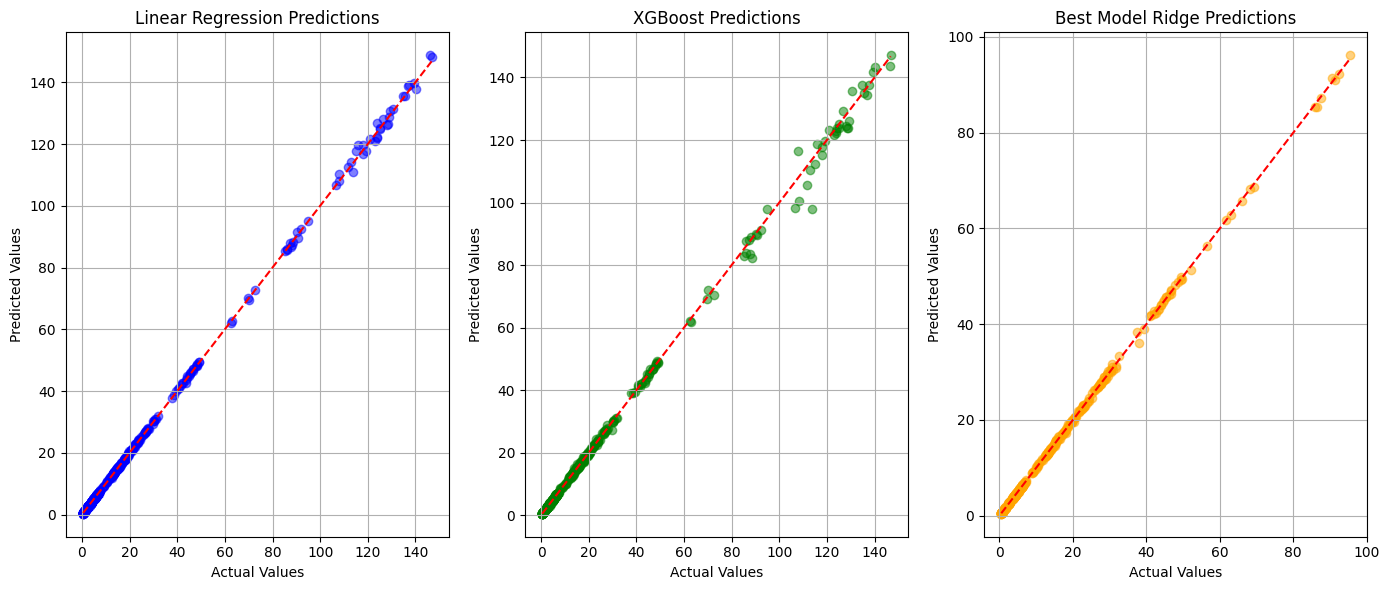

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Linear Regression Visualization
plt.subplot(1, 3, 1)
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()

# XGBoost Visualization
plt.subplot(1, 3, 2)
plt.scatter(y_test, xg_predictions, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('XGBoost Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()

# Ridge Regression Visualization
plt.subplot(1, 3, 3)
plt.scatter(y_test_best, y_pred, color='orange', alpha=0.5)
plt.plot([y_test_best.min(), y_test_best.max()], [y_test_best.min(), y_test_best.max()], color='red', linestyle='--')
plt.title('Best Model Ridge Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()

plt.tight_layout()
plt.show()

This part shows that R2 and other metrics are all positive, which means that the model is performing better than the mean of the target variable. This is a good sign. Therefore, we can say that the model is a good fit for the data. THe relation of values and prediction are lineerly dependent on each other.

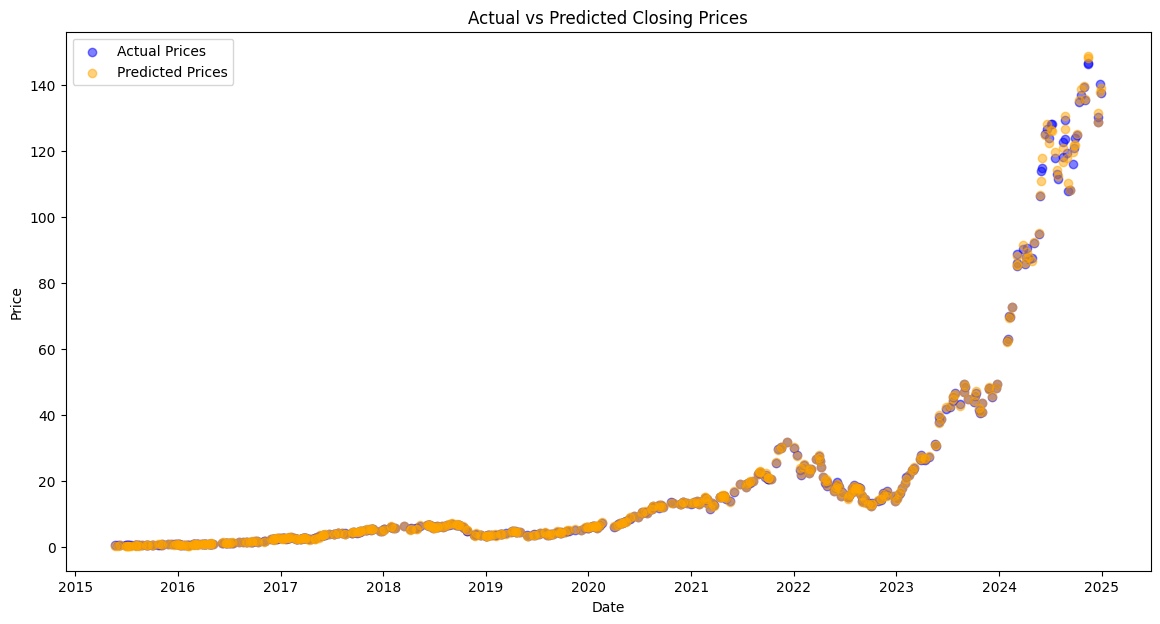

In [11]:
## 7. Visualization
# Plot of actual vs predicted closing prices using a scatter plot
plt.figure(figsize=(14, 7))
plt.scatter(y_test.index, y_test, label='Actual Prices', color='blue', alpha=0.5)
plt.scatter(y_test.index, predictions, label='Predicted Prices', color='orange', alpha=0.5)
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

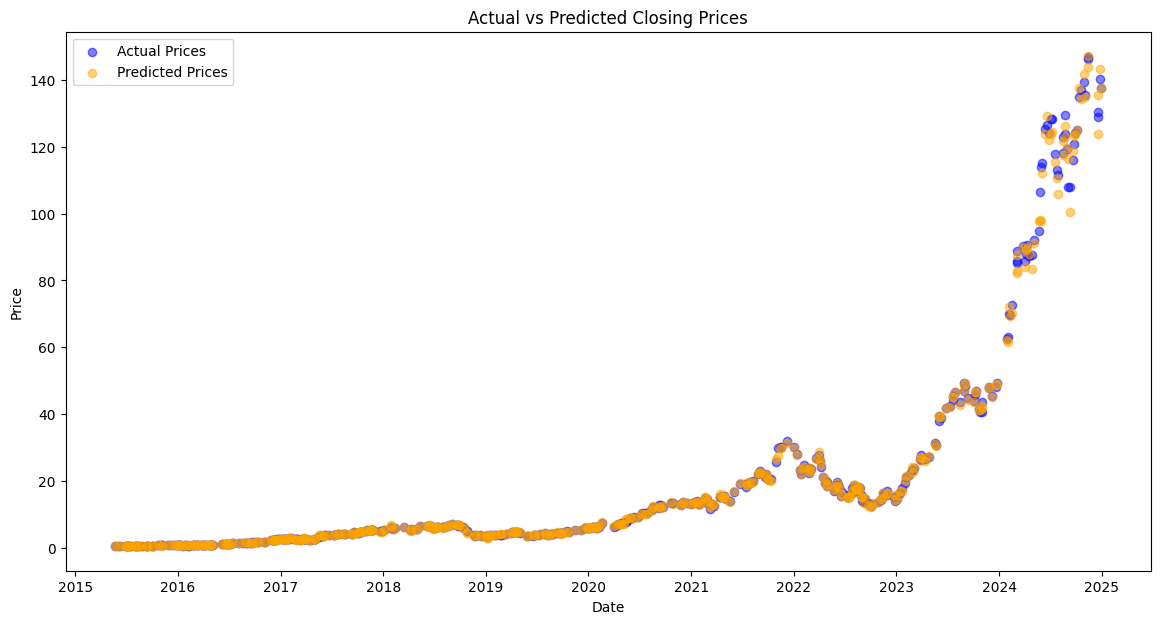

In [12]:
## 7. Visualization
# Plot of actual vs xgboost predicted closing prices using a scatter plot
plt.figure(figsize=(14, 7))
plt.scatter(y_test.index, y_test, label='Actual Prices', color='blue', alpha=0.5)
plt.scatter(y_test.index, xg_predictions, label='Predicted Prices', color='orange', alpha=0.5)
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

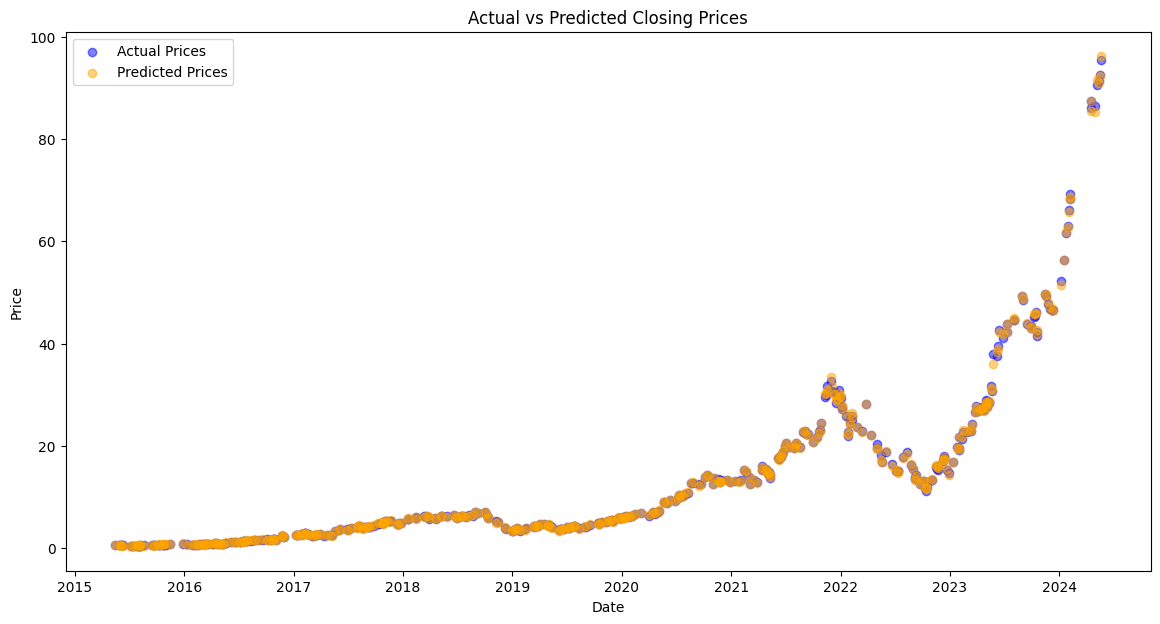

In [13]:
## 7. Visualization
# Plot of best model vs predicted closing prices using a scatter plot
plt.figure(figsize=(14, 7))
plt.scatter(y_test_best.index, y_test_best, label='Actual Prices', color='blue', alpha=0.5)
plt.scatter(y_test_best.index, y_pred, label='Predicted Prices', color='orange', alpha=0.5)
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()